### Figure 2
 

In [2]:

## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib as mpl
import bct
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
import scipy.stats as stats

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mkrxaf5v because the default path (/home/ronaldo/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## All areas

In [3]:
# paths to load data
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

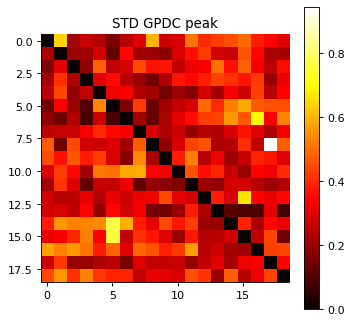

In [29]:
# set figure size
fig=plt.figure(figsize=(5,5), dpi= 80, facecolor='w', edgecolor='k')

# Structural Connectivity
# Fln
# load FLNs
conn = loadmat(pathFln)
fln=conn['Fln']



# Gpdc (Downsample 1kHz)

# matrix to store gpdc values
gpdcMatrixTotal=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)


for i in range(Ntrials):
    #  load GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    # gpdc values
    gpdc=data['arr_1']
    # take peak of gpdc 
    gpdcMatrixTotal[:,:,i]=np.max(gpdc[:,:,:],axis=2).T

# Average GPDC peak    
averageGpdcTotal=np.mean(gpdcMatrixTotal,axis=2)



# Standard deviation GPDC peak

stdGpdcTotal=np.std(gpdcMatrixTotal,axis=2)

# Set 0 to diagonal
np.fill_diagonal(stdGpdcTotal, 0)


# Coefficient of variation
cf=stdGpdcTotal/averageGpdcTotal

# plot GPDC values
color_map =plt.imshow(cf)
# define colormap
color_map.set_cmap("hot")
# define title 
plt.title('STD GPDC peak')
# plot colorbar
cbar =plt.colorbar()


plt.savefig('cf.svg')

In [5]:
# Sum of std of GPDC for a given taget node
stdSumTarget=np.sum(cf,0)
# Sum of std of GPDC for a given source node
stdSumSource=np.sum(cf,1)

In [6]:
# in-strength
inFln=np.sum(fln,0)
# out-strength
outFln=np.sum(fln,1)

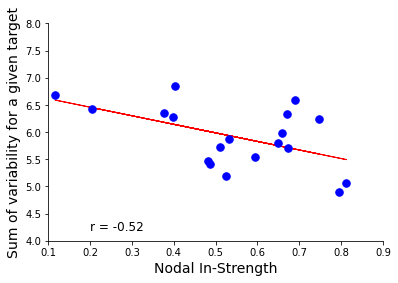

In [33]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

y = np.array(stdSumTarget)
X = np.array(inFln)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.2, 4.2, 'r = %0.2f' % stats.pearsonr(stdSumTarget,inFln)[0],fontsize=12)

plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Sum of variability for a given target', fontsize=14)
plt.xlabel('Nodal In-Strength', fontsize=14)
plt.xlim([0.1,0.9])
plt.ylim([4.0,8])
plt.savefig('target.svg')

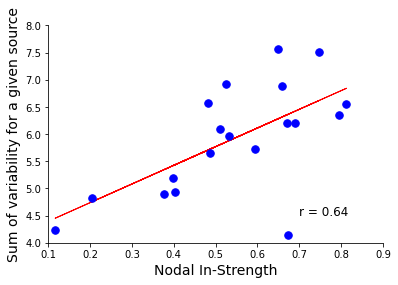

In [31]:

y = np.array(stdSumSource)
X = np.array(inFln)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.7, 4.5, 'r = %0.2f' % stats.pearsonr(stdSumSource,inFln)[0],fontsize=12)


plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Sum of variability for a given source', fontsize=14)
plt.xlabel('Nodal In-Strength', fontsize=14)

plt.xlim([0.1,0.9])
plt.ylim([4,8])
plt.savefig('source.svg')

(4.0, 7.0)

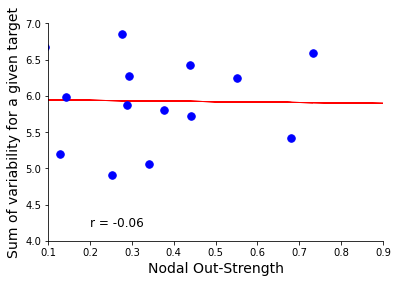

In [9]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

y = np.array(stdSumTarget)
X = np.array(outFln)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.2, 4.2, 'r = %0.2f' % stats.pearsonr(stdSumTarget,outFln)[0],fontsize=12)

plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Sum of variability for a given target', fontsize=14)
plt.xlabel('Nodal Out-Strength', fontsize=14)
plt.xlim([0.1,0.9])
plt.ylim([4.0,7])

(4.0, 8.0)

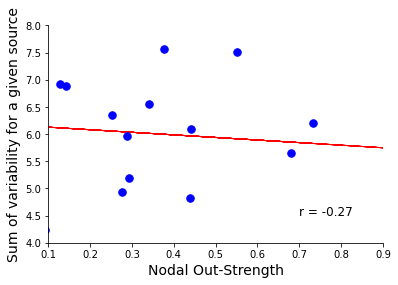

In [10]:

y = np.array(stdSumSource)
X = np.array(outFln)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.7, 4.5, 'r = %0.2f' % stats.pearsonr(stdSumSource,outFln)[0],fontsize=12)


plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Sum of variability for a given source', fontsize=14)
plt.xlabel('Nodal Out-Strength', fontsize=14)

plt.xlim([0.1,0.9])
plt.ylim([4,8])


## In FLN

In [11]:
inFln

array([0.48289525, 0.40217274, 0.50968821, 0.48641961, 0.37740224,
       0.6700465 , 0.59480855, 0.3978457 , 0.81274385, 0.79522494,
       0.523948  , 0.1166622 , 0.53155728, 0.67334727, 0.64825547,
       0.68989389, 0.74694179, 0.2040007 , 0.65896644])

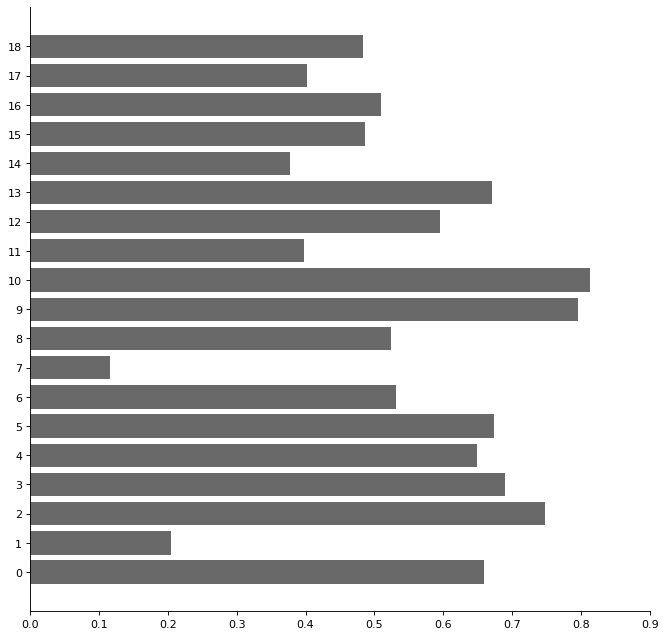

In [32]:
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.barh(range(19),np.flip(inFln),color='dimgray')
plt.yticks(range(19))
plt.xlim([0,0.9])

plt.savefig('inStrenght.svg')

In [27]:
np.sum(fln[:,0])

0.48289524500000003